#Objetivo deste notebook

Esse notebook terá como objetivo descobrir quais variáveis podem ser utilizadas para estimar o consumo médio de cerveja na cidade de São Paulo e, após essa descoberta, essa previsão será realizada.

Como está sendo analisada uma relação de dependência de uma variável a ser estimada em relação a outras variáveis, o modelo de Regressão Linear será utilizado.

##Importando as bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

##Importando o dataset a ser utilizado


In [2]:
dados = pd.read_csv('Consumo_cerveja.csv',sep=';')

##Verificando o conteúdo do dataset

In [3]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


###Dicionário dos dados:

data: indica a data relativa ao dado em questão.

temp_media: indica a temperatura média em graus Celsius.

temp_min: indica a temperatura mínima em graus Celsius.

temp_max: indica a temperatura máxima em graus Celsius.

chuva: indica o nível de precipitação em milímetros.

fds: indica se é final de semana ou não, de modo que 1 significa que sim e 0 significa que não.

consumo: indica o consumo médio de cerveja.

##Verificando a presença de dados faltantes

In [9]:
dados.isnull().sum()

data          0
temp_media    0
temp_min      0
temp_max      0
chuva         0
fds           0
consumo       0
dtype: int64

De acordo com a análise acima o dataset em questão não apresenta dados faltantes.

##Realizando a análise descritiva dos dados em termos estatísticos

In [10]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


Aparentemente com a análise acima as variáveis envolvidas não aparentam ter algum problema.

##Análise gráfica das variáveis

A análise descritiva através do método describe() aparentemente não levantou nenhum erro nas variáveis, porém uma análise gráfica é necessária para confirmar.

As variáveis a serem analisadas são variáveis que empiricamente parecem influenciar no consumo médio de cerveja.

###Análise da variável temp_media

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


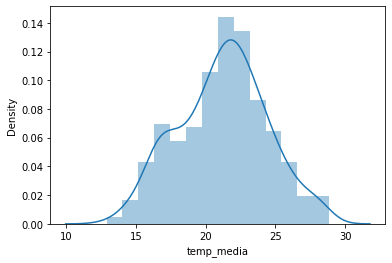

In [11]:
##Plotando a distribuição de frequências

sns.distplot(dados['temp_media'])

In [30]:
#Cálculo das medidas de tendência central

media_temp_media = np.mean(dados['temp_media'])
mediana_temp_media = np.median(dados['temp_media'])
moda_temp_media = dados['temp_media'].mode()
moda_temp_media
print(f"O valor da média é {round(media_temp_media,2)}, o da mediana é {mediana_temp_media} e o da moda é {moda_temp_media[0]} ou {moda_temp_media[1]}" )


O valor da média é 21.23, o da mediana é 21.38 e o da moda é 22.76 ou 24.0


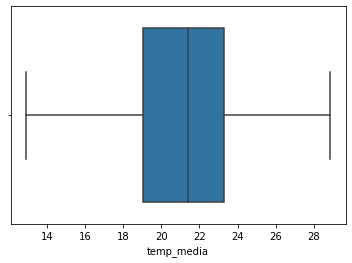

In [12]:
##Plotando boxplot.

sns.boxplot(data=dados,x='temp_media')

Com as análises gráficas e a comparação das medidas de tendência central, percebe-se que a variável temp_media apresenta uma distribuição bem próxima da normal e não apresenta outliers.

##Análise da variável temp_min

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


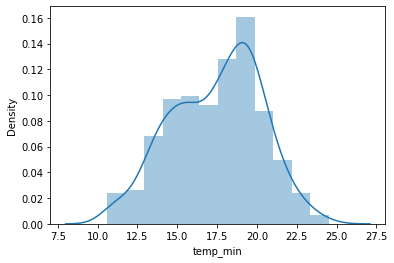

In [39]:
##Plotando a distribuição de frequências

sns.distplot(dados['temp_min'])

In [33]:
#Cálculo das medidas de tendência central

media_temp_min = np.mean(dados['temp_min'])
mediana_temp_min = np.median(dados['temp_min'])
moda_temp_min = dados['temp_min'].mode()
print(f"O valor da média é {round(media_temp_min,2)}, o da mediana é {mediana_temp_min} e o da moda é {moda_temp_min[0]} ou {moda_temp_min[1]}" )


O valor da média é 17.46, o da mediana é 17.9 e o da moda é 18.2 ou 19.3


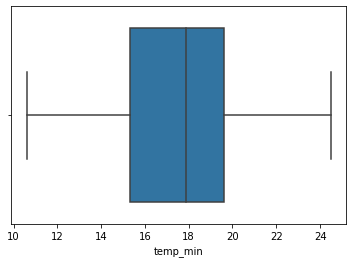

In [41]:
##Plotando boxplot.

sns.boxplot(data=dados,x='temp_min')

Com as análises gráficas e a comparação das medidas de tendência central, percebe-se que a variável temp_min apresenta uma distribuição bem próxima da normal e não apresenta outliers.

##Análise da variável temp_max

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


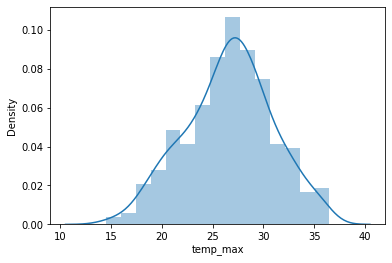

In [42]:
##Plotando a distribuição de frequências

sns.distplot(dados['temp_max'])

In [45]:
#Cálculo das medidas de tendência central

media_temp_max = np.mean(dados['temp_max'])
mediana_temp_max = np.median(dados['temp_max'])
moda_temp_max = dados['temp_max'].mode()
print(f"O valor da média é {round(media_temp_max,2)}, o da mediana é {mediana_temp_max} e o da moda é {moda_temp_max[0]} ou {moda_temp_max[1]} ou {moda_temp_max[2]}." )


O valor da média é 26.61, o da mediana é 26.9 e o da moda é 27.2 ou 27.4 ou 28.0.


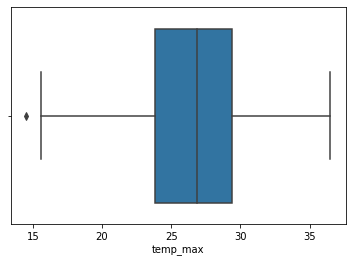

In [46]:
##Plotando boxplot.

sns.boxplot(data=dados,x='temp_max')

Com as análises gráficas e a comparação das medidas de tendência central, percebe-se que a variável temp_max apresenta uma distribuição bem próxima da normal e apresenta poucos outliers, mas que não influenciam significativamente na variável.

##Análise gráfica da variável chuva

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


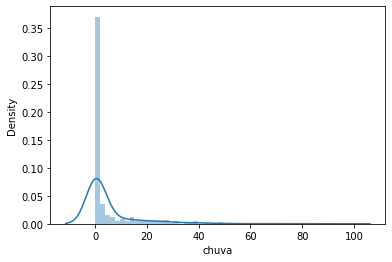

In [57]:
##Plotando a distribuição de frequências

sns.distplot(dados['chuva'])

In [49]:
#Cálculo das medidas de tendência central

media_chuva = np.mean(dados['chuva'])
mediana_chuva = np.median(dados['chuva'])
moda_chuva = dados['chuva'].mode()
moda_chuva
print(f"O valor da média é {round(media_chuva,2)}, o da mediana é {mediana_chuva} e o da moda é {moda_chuva}" )

O valor da média é 5.2, o da mediana é 0.0 e o da moda é 0    0.0
dtype: float64


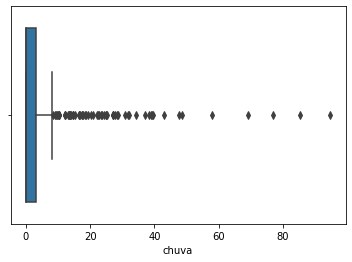

In [58]:
##Plotando boxplot.

sns.boxplot(data=dados,x='chuva')

Com as análises gráficas e a comparação das medidas de tendência central, percebe-se que a variável chuva apresenta uma distribuição assimétrica à direita e uma significativa quantidade de outliers(possivelmente responsáveis pela assimetria). 

Porém, o tratamento dela não será realizado, uma vez que sua distorção refere-se ao fato de que no ano em São Paulo há mais dias que não chovem do que dias que chovem e o tratamento dela ou excluiria alguma parte dos dias que chovem ou excluiria os dias que não chovem.

##Análise gráfica da variável consumo

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


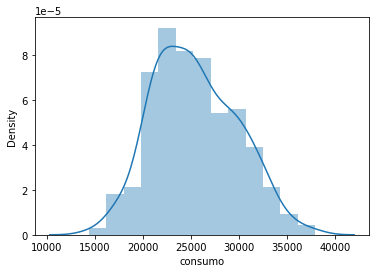

In [63]:
##Plotando a distribuição de frequências

sns.distplot(dados['consumo'])

In [62]:
#Cálculo das medidas de tendência central

media_consumo = np.mean(dados['consumo'])
mediana_consumo = np.median(dados['consumo'])
moda_consumo = dados['consumo'].mode()
print(f"O valor da média é {round(media_consumo,2)}, o da mediana é {mediana_consumo} e o da moda é {moda_consumo[0]}." )


O valor da média é 25401.37, o da mediana é 24867.0 e o da moda é 24862.


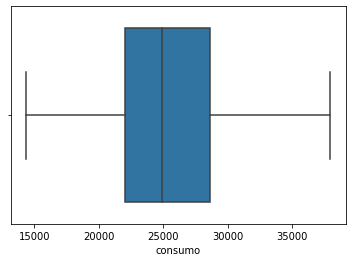

In [65]:
##Plotando boxplot.

sns.boxplot(data=dados,x='consumo')

Com as análises gráficas e a comparação das medidas de tendência central, percebe-se que a variável consumo apresenta uma distribuição bem próxima da normal e não apresenta outliers.

##Medindo o nível de correlação entre as variáveis

In [67]:
dados.corr().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


Analisando a matriz de correlação acima é possível perceber que todas as variáveis possuem um nível relativamente bom de correlação com a variável consumo.

Porém, é válido ressaltar que variáveis explicativas(que serão utilizadas para estimar a variável dependente, que no caso é consumo) não podem apresentar um nível de correlação tão alto entre si. Dessa forma, é válido ressaltar que apenas uma variável poderá ser escolhida dentre temp_media, temp_min e temp_max, e, preferencialmente, a escolhida será a com maior nível de correlação que é a **temp_max**.

As outras variáveis a serem escolhidas são **chuva** e **fds**.

##Análise gráfica de correlação

Agora que já se sabe o nível de correlação entre as variáveis explicativas e a variável consumo, é necessário saber que tipo de relação é essa, uma vez que para utilizar a Regressão Linear a relação deve ser linear.

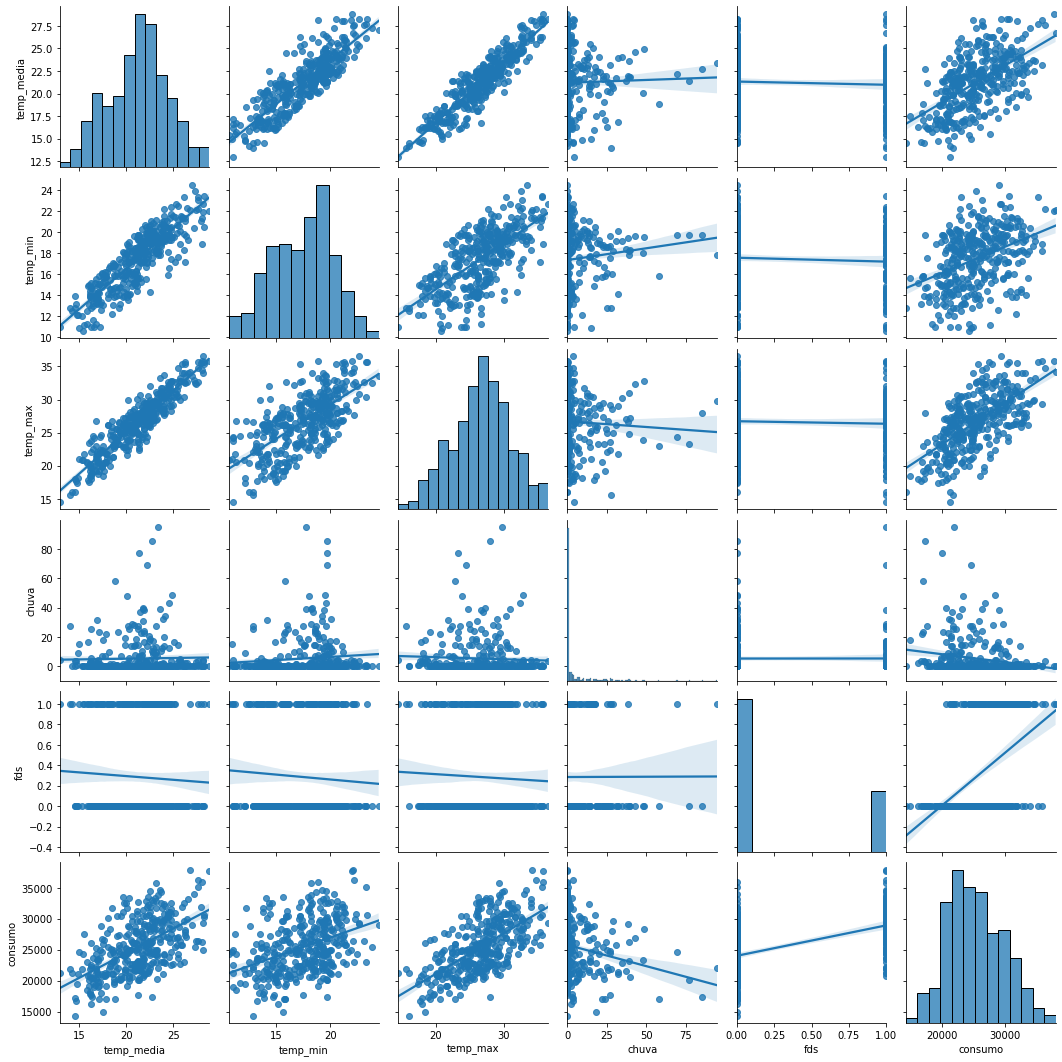

In [77]:
sns.pairplot(data=dados,kind='reg')

Com a análise acima ficou perceptível que a relação entre as variáveis explicativas e a variável dependente é linear.

Sendo assim, será possível utilizar a Regressão Linear para prever o valor da variável dependente a partir das variáveis explicativas.

##Criação do modelo

Antes de criar o modelo é necessário separar os dados das variáveis em questão que serão utilizados treino e os que serão utilizados para teste

#### Separação das variáveis envolvidas

In [92]:
#Separação da variável dependente

y = dados['consumo']

In [93]:
#Separação das variáveis explicativas

X = dados[['temp_max','chuva','fds']]

#### Separação das variáveis envolvidas em treino e teste

In [94]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size = 0.3, random_state =2811)

####Criando o modelo

In [95]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

## Treinamento, teste e métricas do modelo

In [96]:
#Treinando o modelo
modelo.fit(X_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
#Calculando o coeficiente de determinação para o treino.

print(f"R² = {round(modelo.score(X_treino,y_treino),2)}")

R² = 0.73


In [99]:
#Testando o modelo e comparando através do coeficiente de determinação.

y_previsto = modelo.predict(X_teste)

print(f"R² = {round(r2_score(y_teste,y_previsto),2)}")

R² = 0.69


## Realizando previsões pontuais

In [108]:
#Selecionado os valores das variáveis explicativas para realizar a previsão pontual
temperatura = 35
chuva = 0
fds = 1
entrada = [[temperatura,chuva,fds]]

In [109]:
#Retorno do consumo médio de cerveja de acordo com o valor das variáveis explicativas.
previsao = modelo.predict(entrada)
previsao[0].round(2)

35318.85

## Comparando graficamente a previsão e os dados de treino

In [112]:
y_treino_previsto = modelo.predict(X_treino)

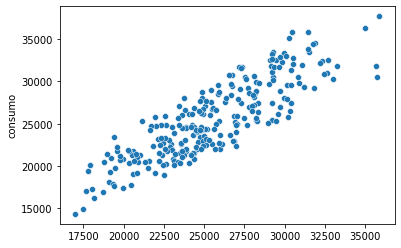

In [124]:
#Plotando um gráfico da variável dependente de treino e da variável dependente prevista para ver a variação entre elas.

sns.scatterplot(x=y_treino_previsto, y=y_treino)

Como é possível perceber no gráfico elas começam a variar mais para valores mais altos.

In [114]:
#Calculando o erro entre elas:

erro = y_treino - y_treino_previsto

Plotar o gráfico da variável prevista e do erro é algo importante, uma vez que se a variância do erro no gráfico for constante, ou seja, se obedece ao princípio do homocedasticidade o modelo é confiável.

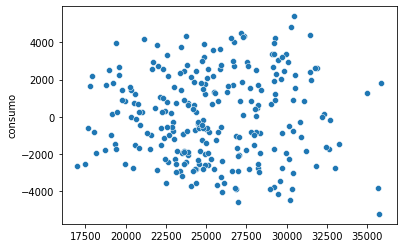

In [122]:
#Plotando um gráfico sobre os valores previstos e o erro.

sns.scatterplot(x=y_treino_previsto, y=erro)

Plotar o gráfico com o erro ao quadrado torna mais perceptível a variância

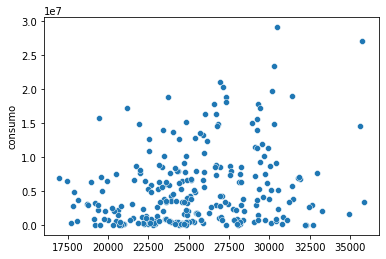

In [123]:
#Plotando um gráfico sobre os valores previstos e o erro ao quadrado.

sns.scatterplot(x=y_treino_previsto, y=erro**2)

## Comparando com outros modelos

Esse modelo irá contar com a variável temp_media ao invés da temp_max

In [128]:
#Criação dos datasets das variáveis envolvidas.

y2 = dados['consumo']

X2 = dados[['temp_media','chuva','fds']]

In [132]:
#Separação em datasets de treino e teste

X2_treino, X2_teste, y2_treino, y2_teste = train_test_split(X2,y2,test_size=0.3, random_state=2811)

In [133]:
#Criação do modelo

modelo2 = LinearRegression()

In [139]:
#Treinamento do modelo

modelo2.fit(X2_treino,y2_treino)
y2_previsto = modelo2.predict(X2_teste)

### Comparando as métricas dos dois modelos

In [138]:
r2_primeiro_modelo_treino = round(modelo.score(X_treino,y_treino),2)
r2_segundo_modelo_treino = round(modelo2.score(X2_treino,y2_treino),2)

print(f"O coeficiente de determinação(R²) no treino para o primeiro modelo é de {r2_primeiro_modelo_treino} \n enquanto o do segundo modelo é de {r2_segundo_modelo_treino}.")

O coeficiente de determinação(R²) no treino para o primeiro modelo é de 0.73 
 enquanto o do segundo modelo é de 0.66.


In [143]:
r2_primeiro_modelo_teste = round(r2_score(y_teste,y_previsto),2)
r2_segundo_modelo_teste = round(r2_score(y2_teste,y2_previsto,),2)

print(f"O coeficiente de determinação(R²) no teste para o primeiro modelo é de {r2_primeiro_modelo_teste} \n enquanto o do segundo modelo é de {r2_segundo_modelo_teste}.")

O coeficiente de determinação(R²) no teste para o primeiro modelo é de 0.69 
 enquanto o do segundo modelo é de 0.66.


## Comparando os dois modelos através de outras métricas

In [144]:
EQM_modelo1 = round(mean_squared_error(y_teste,y_previsto),2)
EQM_modelo2 = round(mean_squared_error(y2_teste,y2_previsto),2)

print(f"O Erro Quadrático Médio no teste para o primeiro modelo é de {EQM_modelo1} \n enquanto o do segundo modelo é de {EQM_modelo2}.")

O Erro Quadrático Médio no teste para o primeiro modelo é de 5471976.38 
 enquanto o do segundo modelo é de 6060775.46.


In [146]:
REQM_modelo1 = round(np.sqrt(mean_squared_error(y_teste,y_previsto)),2)
REQM_modelo2 = round(np.sqrt(mean_squared_error(y2_teste,y2_previsto)),2)
print(f"A Raiz do Erro Quadrático Médio no teste para o primeiro modelo é de {REQM_modelo1} \n enquanto o do segundo modelo é de {REQM_modelo2}.")

A Raiz do Erro Quadrático Médio no teste para o primeiro modelo é de 2339.23 
 enquanto o do segundo modelo é de 2461.86.


Portanto, é possível concluir que o **primeiro modelo** teve um desempenho melhor que o segundo modelo.

#Criando um simulador simples

Para rodar o simulador basta rodar a célula abaixo e inserir os dados.



In [150]:
temperatura_simulador = float(input("Digite a temperatura em questão:"))
chuva_simulador = float(input("Caso esteja chovendo digite quantos milímetros está chovendo, caso não esteja digite 0:"))
fds_simulador = input("O dia em questão é um final de semana?")

if fds_simulador == "Sim" or fds_simulador == "sim" or fds_simulador == "ss" or fds_simulador == "s":
  fds_simulador = 1
elif fds_simulador == "Não" or fds_simulador == "não" or fds_simulador == "nn" or fds_simulador == "n" or fds_simulador == "Nao" or fds_simulador == "nao" :
  fds_simulador = 0

entrada_simulador = [[temperatura_simulador,chuva_simulador, fds_simulador]]
print(f"O consumo médio de cerveja para a cidade de São Paulo nos quesitos passados será de {round(modelo.predict(entrada_simulador)[0],2)} litros.")

Digite a temperatura em questão:33
Caso esteja chovendo digite quantos milímetros está chovendo, caso não esteja digite 0:8
O dia em questão é um final de semana?ss
O consumo médio de cerveja para a cidade de São Paulo nos quesitos passados será de 33463.11 litros.
